### Summary
In this notebook, we will quickly build a model to predict the house price. And, we will conduct analysis about
prediction error. The error analysis will provide directional information for our next iteration of model development.

#### Author
* author: Yi Zhang <beingzy@gmai.com>
* date: 2017/09/07

In [14]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk

import matplotlib.pyplot as plt

%matplotlib inline

### Data Preparation
In this analysis, we will partition data and prepare data with quick manner for traning predictive models.

In [2]:
!ls data

properties_2016.csv    train_2016_v2.csv
sample_submission.csv  zillow_data_dictionary.xlsx


In [3]:
infile_path = os.path.join('./data', 'properties_2016.csv')
properties_df = pd.read_csv(infile_path, header=0, sep=',')

/home/yi/App/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
properties_df.head(2)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN


In [15]:
infile_path = os.path.join('./data', 'train_2016_v2.csv')
train_df = pd.read_csv(infile_path, header=0, sep=',')

In [16]:
train_df.head(2)

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01


examine the missing data percetnage per columns.

In [5]:
null_ptg_df = (properties_df
               .apply(lambda x: x.isnull().sum() / len(x), axis=0)
               .reset_index())

null_ptg_df.columns = ['column_name', 'null_frac']
null_ptg_df.sort_values('null_frac', ascending=False, inplace=True)

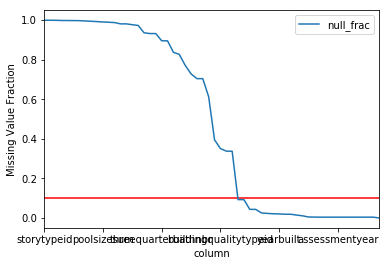

In [6]:
fig = null_ptg_df.plot(x='column_name', y='null_frac')
plt.hlines(y=0.1, xmin=0, xmax=100,color ='red')
fig.set_xlabel('column')
fig.set_ylabel('Missing Value Fraction')

**Figure**: the plot visualize the missing value fraction per columns. 

**Discussion**: We could notified that there are less than half of columns whose missing value rate is less than 10%.

In order to quickly train a rudimentary model, we will only select columns which have high non-null value percetage.

In [7]:
slc_columns = null_ptg_df.loc[null_ptg_df['null_frac'] < 0.1, 'column_name'].tolist()
print('the number of selected columns: {}'.format(len(slc_columns)))

the number of selected columns: 25


In [8]:
slc_columns

['lotsizesquarefeet',
 'finishedsquarefeet12',
 'calculatedbathnbr',
 'fullbathcnt',
 'censustractandblock',
 'landtaxvaluedollarcnt',
 'regionidcity',
 'yearbuilt',
 'calculatedfinishedsquarefeet',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'taxamount',
 'regionidzip',
 'propertycountylandusecode',
 'roomcnt',
 'bathroomcnt',
 'bedroomcnt',
 'assessmentyear',
 'regionidcounty',
 'fips',
 'latitude',
 'longitude',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'parcelid']

### Explore training data
It is of interest to develop basic understanding of training dat by answering following questions:
* how many transaction per units?
* the number of units?
* the transaction year distribution?

### Subset Data
In this section, we do simple data cleaning procedure to make the data ready for modeling.

In [11]:
keep_idx = [True] * properties_df.shape[0]

for ii, col in enumerate(slc_columns):
    idx = properties_df[col].notnull()
    keep_idx = keep_idx & idx

frac = sum(keep_idx) / len(keep_idx)
print("the fraction of obs. with no null value in any selected columns: {}".format(frac))

the fraction of obs. with no null value in any selected columns: 0.8123965527464168


In [12]:
sm_df = properties_df.loc[keep_idx, slc_columns]
sm_df.shape

(2425180, 25)

split data into training, evalidation and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

xx_train, yy_train, xx_test, yy_test = train_test_split()